# Bayesian Optimization

[Bayesian Optimization](https://en.wikipedia.org/wiki/Bayesian_optimization) is used to solve an optimization problem
$$ x^* = \text{argmin} \ f(x), $$
where $f$ is an unknown objective function which
+ hard to compute,
+ has no derivative,
+ observations of $f$ contain noise.

An optimization process includes constructing a sequence of points $\{x_n\}$ which converges to $x^*$. However, due to the above restrictions, it is hard to construct such sequence using information directly from $f$. In Bayesian Optimization, we put a [Gaussian Process](https://en.wikipedia.org/wiki/Gaussian_process) prior on $f$ and derive from it an "acquisition" function $\alpha(x)$ which is easy to evaluate and get derivatives (hence optimizing $\alpha(x)$ is easy). This "acquisition" function encodes the following information for $f$: its minimizer is a candidate for $x_n$.

Each time we get more information from $f$, the Gaussian Process model will be updated (similar to the way we update posteriors in Bayesian models) and the derived "acquisition" function will reflect more information about $x^*$. After a number of steps, it is likely that $\{x_n\}$ will converge to the minimizer of $f$.

In this tutorial, we will see how to use the Gaussian Process module in Pyro to do Bayesian Optimization.

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

from pyro.contrib.gp.kernels import RBF
from pyro.contrib.gp.models import GPRegression
from pyro.optim import Adam

## Define a problem

The objective function we are going to solve is
$$f(x) = \frac{x^2}{10} + \sin(x), \quad x \in (-5, 5).$$

In [18]:
def f(x):
    return x**2 / 10 + torch.sin(x)

The minimizer of $f$ is $-1.30644$. Let's take a plot for $x$.

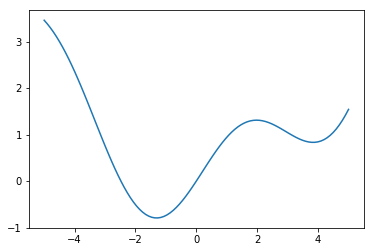

In [22]:
x = torch.linspace(-5, 5)
plt.plot(x.numpy(), f(x).numpy());

## Learning

### Define an acquisition function

Inference of

In [27]:
class LowerConfidenceBound(nn.Module):
    def __init__(self, model):
        self.model = model

    def update_data(self, X, objective):
        y = objective(X)
        if self.model.X is not None:
            X = torch.cat([self.model.X, x])
            y = torch.cat([self.model.y, y])
        self.model.set_data(X, y)
        self.model.optimize(optimizer=Adam({}))

    def minimize(self, x0=torch.tensor([0])):
        x = torch.tensor(x0, requires_grad=True)
        minimizer = optim.LBFGS([x], lr=0.01)
        def closure():
            minimizer.zero_grad()
            y = self(x)
            y.backward()
            return y
        minimizer.step(closure)
        return x.detach()

    def forward(self, x):
        loc, var = model(x, full_cov=False, noiseless=False)
        sd = var.sqrt()
        return loc - 2 * sd

In [31]:
gpmodel = GPRegression(X=None, y=None, kernel=RBF(1), noise=torch.Tensor([0.01]))
gpmodel.fix_param("noise")
acquisition = LowerConfidenceBound(gpmodel)

AttributeError: 'NoneType' object has no attribute 'size'

### Make a plot function

### One step

#### Two steps

#### Three steps

Four steps

Ten steps